<a href="https://colab.research.google.com/github/joaovictordds/Segmentacao_de_clientes/blob/main/tratamento_base_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1ª etapa: Tratamento da base de dados

O conjunto de dados inclui as seguintes informações:

- Invoice Number: identificador único de cada transação.
- Stock Code Product: código do item.
- Description Product: nome do item
- Quantity: A quantidade de cada item comprado por transação.
- Invoice Date: O dia em que a transação ocorreu
- Unit Price: Preço do produto por unidade
- Customer ID: identificador único do cliente
- Country: O nome do país que o cliente reside

Roteiro Sugerido para a Solução:

- Explore os Dados usando ferramentas e testes Estatísticos com o objetivo de encontrar inconsistências dos dados e tratar possíveis dados faltantes.
- Prepare os Dados para que os Algoritmos Estatísticos ou de Machine Learning sejam capazes de aprender a tarefa.

### Limpeza & Preparação dos dados
- Explore os Dados usando ferramentas e testes Estatísticos com o objetivo de encontrar inconsistências dos dados e tratar possíveis dados faltantes.

In [3]:
#Importação das 1ªs bibliotecas e acesso aos dados
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

dados = pd.read_csv('Ecommerce.csv', encoding='ISO-8859-1', parse_dates=['InvoiceDate'])
dados.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850.0,United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850.0,United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850.0,United Kingdom,NaN


In [4]:
#Renomeando colunas
nomes = ['IdVenda', 'CodItem', 'Item', 'Qtde', 'DataVenda', 'PrecoUnit', 'IdCliente', 'Pais', 'desc']         
dados.columns = nomes
#Eliminando a coluna desnecessária
dados.drop(columns='desc', inplace=True)
dados.head(3)

,IdVenda,CodItem,Item,Qtde,DataVenda,PrecoUnit,IdCliente,Pais
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850.0,United Kingdom


In [5]:
#Desmenbrando a variável data
dados['Ano'] = dados['DataVenda'].dt.year
dados['Mes'] = dados['DataVenda'].dt.month
dados['Dia'] = dados['DataVenda'].dt.day
dados.head(3)

,IdVenda,CodItem,Item,Qtde,DataVenda,PrecoUnit,IdCliente,Pais,Ano,Mes,Dia
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850.0,United Kingdom,2016,11,29
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850.0,United Kingdom,2016,11,29
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850.0,United Kingdom,2016,11,29


In [6]:
#Criando a variável Valor Total
dados['ValorTotal'] = dados['Qtde'] * dados['PrecoUnit']
dados.head(3)

,IdVenda,CodItem,Item,Qtde,DataVenda,PrecoUnit,IdCliente,Pais,Ano,Mes,Dia,ValorTotal
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850.0,United Kingdom,2016,11,29,15.30
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850.0,United Kingdom,2016,11,29,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850.0,United Kingdom,2016,11,29,22.00


In [7]:
# Verificando campos vazios
dados.isnull().sum()

IdVenda            0
CodItem            0
Item            1454
Qtde               0
DataVenda          0
PrecoUnit          0
IdCliente     135080
Pais               0
Ano                0
Mes                0
Dia                0
ValorTotal         0
dtype: int64

In [8]:
# Eliminando as linhas dos dados inválidos
dados.dropna(axis = 0, inplace = True)

In [9]:
# Transformando variavel IdCliente em inteiro
dados['IdCliente'] = dados['IdCliente'].astype('int64')

# Transformando variáveis objeto em categoricas para reduzir o uso da memória
categoricas = ['IdVenda', 'CodItem', 'Item', 'Pais']
for c in categoricas:
    dados[c] = dados[c].astype('category')

dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   IdVenda     406829 non-null  category      
 1   CodItem     406829 non-null  category      
 2   Item        406829 non-null  category      
 3   Qtde        406829 non-null  int64         
 4   DataVenda   406829 non-null  datetime64[ns]
 5   PrecoUnit   406829 non-null  float64       
 6   IdCliente   406829 non-null  int64         
 7   Pais        406829 non-null  category      
 8   Ano         406829 non-null  int64         
 9   Mes         406829 non-null  int64         
 10  Dia         406829 non-null  int64         
 11  ValorTotal  406829 non-null  float64       
dtypes: category(4), datetime64[ns](1), float64(2), int64(5)
memory usage: 31.8 MB


In [11]:
# Verifiando linhas com erro na venda
sem_vendas = dados[dados['ValorTotal'] <= 0]
sem_vendas.shape

(8945, 12)

In [12]:
# Elimando essas linhas
sem_vendas = dados[dados['ValorTotal'] <=0].index
dados.drop(sem_vendas, inplace = True)

In [13]:
# Linhas com erro na quantidade - eliminando
erro_qt = dados[dados['Qtde'] <= 0].index
dados.drop(erro_qt, inplace=True )

**Verificando outliers das variáveis numéricas**

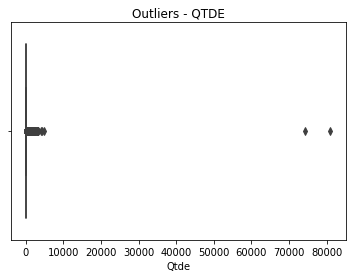

In [14]:
import seaborn as sns
sns.boxplot(dados['Qtde']).set_title('Outliers - QTDE');

In [15]:
dados[dados['Qtde'] > 2000]

,IdVenda,CodItem,Item,Qtde,DataVenda,PrecoUnit,IdCliente,Pais,Ano,Mes,Dia,ValorTotal
4945,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2016-11-30,0.18,16754,United Kingdom,2016,11,30,518.40
32671,539101,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,2400,2016-12-14,0.94,16029,United Kingdom,2016,12,14,2256.00
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2017-01-09,2.10,15749,United Kingdom,2017,1,9,6539.40
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2017-01-16,1.04,12346,United Kingdom,2017,1,16,77183.60
80742,543057,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2592,2017-02-01,0.21,16333,United Kingdom,2017,2,1,544.32
87631,543669,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,2400,2017-02-09,0.94,16029,United Kingdom,2017,2,9,2256.00
91772,544152,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,2400,2017-02-14,0.06,14609,United Kingdom,2017,2,14,144.00
97432,544612,22053,EMPIRE DESIGN ROSETTE,3906,2017-02-20,0.82,18087,United Kingdom,2017,2,20,3202.92
125282,547037,21967,PACK OF 12 SKULL TISSUES,2160,2017-03-18,0.25,14101,United Kingdom,2017,3,18,540.00
160546,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2017-04-16,2.10,15749,United Kingdom,2017,4,16,6539.40


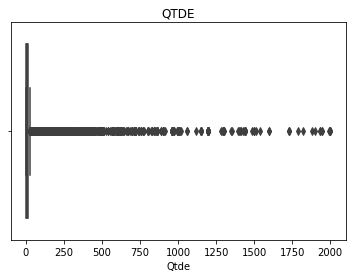

In [16]:
# Eliminando os valores discrepantes
outliers = dados[(dados['Qtde'] > 2000)].index
dados.drop(outliers, inplace = True)
# Verificando como ficou
sns.boxplot(dados['Qtde']).set_title('QTDE');

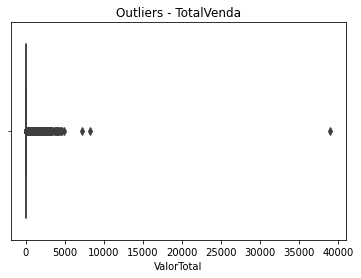

In [18]:
# Variável ValorTotal
sns.boxplot(dados['ValorTotal']).set_title('Outliers - TotalVenda');

In [21]:
dados[dados['ValorTotal'] > 3500]

,IdVenda,CodItem,Item,Qtde,DataVenda,PrecoUnit,IdCliente,Pais,Ano,Mes,Dia,ValorTotal
16438,537659,21623,VINTAGE UNION JACK MEMOBOARD,600,2016-12-05,6.38,18102,United Kingdom,2016,12,5,3828.00
19871,537899,22328,ROUND SNACK BOXES SET OF 4 FRUITS,1488,2016-12-07,2.55,12755,Japan,2016,12,7,3794.40
52134,540689,22470,HEART OF WICKER LARGE,1284,2017-01-09,3.21,17450,United Kingdom,2017,1,9,4121.64
52709,540815,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1930,2017-01-09,2.55,15749,United Kingdom,2017,1,9,4921.50
52710,540815,21175,GIN + TONIC DIET METAL SIGN,2000,2017-01-09,1.85,15749,United Kingdom,2017,1,9,3700.00
52772,540818,48185,DOORMAT FAIRY CAKE,670,2017-01-09,6.75,15749,United Kingdom,2017,1,9,4522.50
160542,550461,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1930,2017-04-16,2.40,15749,United Kingdom,2017,4,16,4632.00
160544,550461,48185,DOORMAT FAIRY CAKE,670,2017-04-16,6.35,15749,United Kingdom,2017,4,16,4254.50
173382,551697,POST,POSTAGE,1,2017-05-01,8142.75,16029,United Kingdom,2017,5,1,8142.75
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2017-06-08,649.50,15098,United Kingdom,2017,6,8,38970.00


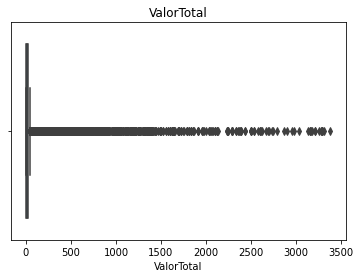

In [22]:
# Eliminando os valores discrepantes
outliers = dados[(dados['ValorTotal'] > 3500)].index
dados.drop(outliers, inplace = True)
# Verificando o novo boxplot
sns.boxplot(dados['ValorTotal']).set_title('Valor Total');

In [23]:
dados.describe()

,Qtde,PrecoUnit,IdCliente,Ano,Mes,Dia,ValorTotal
count,397846.000000,397846.000000,397846.000000,397846.000000,397846.000000,397846.000000,397846.000000
mean,12.428502,3.063650,15294.425728,2016.934264,7.547898,15.004831,21.379548
std,37.152475,13.954398,1713.136329,0.247821,3.407181,8.796149,63.685706
min,1.000000,0.001000,12347.000000,2016.000000,1.000000,1.000000,0.001000
25%,2.000000,1.250000,13969.000000,2017.000000,5.000000,7.000000,4.680000
50%,6.000000,1.950000,15159.000000,2017.000000,8.000000,15.000000,11.800000
75%,12.000000,3.750000,16795.000000,2017.000000,11.000000,22.000000,19.800000
max,2000.000000,3155.950000,18287.000000,2017.000000,12.000000,31.000000,3380.000000


In [29]:
dados[(dados['PrecoUnit'] < 0.03)]

,IdVenda,CodItem,Item,Qtde,DataVenda,PrecoUnit,IdCliente,Pais,Ano,Mes,Dia,ValorTotal
157195,550193,PADS,PADS TO MATCH ALL CUSHIONS,1,2017-04-13,0.001,13952,United Kingdom,2017,4,13,0.001
279045,561226,PADS,PADS TO MATCH ALL CUSHIONS,1,2017-07-24,0.001,15618,United Kingdom,2017,7,24,0.001
359871,568200,PADS,PADS TO MATCH ALL CUSHIONS,1,2017-09-23,0.001,16198,United Kingdom,2017,9,23,0.001
361741,568375,BANK CHARGES,Bank Charges,1,2017-09-24,0.001,13405,United Kingdom,2017,9,24,0.001


In [32]:
dados[(dados['PrecoUnit'] > 1000)]

,IdVenda,CodItem,Item,Qtde,DataVenda,PrecoUnit,IdCliente,Pais,Ano,Mes,Dia,ValorTotal
117054,546328,M,Manual,1,2017-03-09,1687.17,14911,EIRE,2017,3,9,1687.17
117055,546329,M,Manual,1,2017-03-09,1687.17,14911,EIRE,2017,3,9,1687.17
144826,548813,M,Manual,1,2017-04-02,2382.92,12744,Singapore,2017,4,2,2382.92
144828,548813,M,Manual,1,2017-04-02,1252.95,12744,Singapore,2017,4,2,1252.95
144829,548820,M,Manual,1,2017-04-02,2053.07,12744,Singapore,2017,4,2,2053.07
145831,548913,M,Manual,1,2017-04-03,1136.30,12669,France,2017,4,3,1136.30
150615,549468,M,Manual,1,2017-04-06,1867.86,17940,United Kingdom,2017,4,6,1867.86
200745,554155,M,Manual,1,2017-05-21,1241.98,12757,Portugal,2017,5,21,1241.98
201553,554301,M,Manual,1,2017-05-21,1241.98,12757,Portugal,2017,5,21,1241.98
297438,562946,M,Manual,1,2017-08-09,2500.00,15581,United Kingdom,2017,8,9,2500.00


In [34]:
dados.shape

(397846, 12)

In [33]:
# Dados Finalizados para uso
dados.head(5)

,IdVenda,CodItem,Item,Qtde,DataVenda,PrecoUnit,IdCliente,Pais,Ano,Mes,Dia,ValorTotal
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850,United Kingdom,2016,11,29,15.30
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850,United Kingdom,2016,11,29,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850,United Kingdom,2016,11,29,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850,United Kingdom,2016,11,29,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850,United Kingdom,2016,11,29,20.34


In [35]:
dados.to_csv('dataprep.csv')

In [36]:
dados.nunique()

IdVenda       18515
CodItem        3664
Item           3876
Qtde            279
DataVenda       305
PrecoUnit       435
IdCliente      4335
Pais             37
Ano               2
Mes              12
Dia              31
ValorTotal     2907
dtype: int64

A base de dados está pronta para análises e modelagem!